In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importing the data

In [2]:
data1 = pd.read_csv("https://www.mghassany.com/MLcourseEfrei/datasets/data1.csv", sep=",")
data1

,X1,X2,truth
0,6.488267,0.250064,4
1,2.521947,-2.697986,3
2,3.068773,-2.900076,3
3,4.314275,0.702951,1
4,2.384499,-2.535635,3
...,...,...,...
395,4.810405,0.241009,1
396,4.712744,0.355724,1
397,0.601672,1.200831,2
398,2.873527,0.090830,3


In [3]:
data2 = pd.read_csv("https://www.mghassany.com/MLcourseEfrei/datasets/data2.csv", sep=",")
data2

,X1,X2,truth
0,9.065013,3.669309,4
1,-0.250513,-0.981009,3
2,0.212164,-0.863954,3
3,6.752254,2.902041,1
4,-0.216189,-0.914358,3
...,...,...,...
395,6.795891,2.768320,1
396,6.819415,2.815126,1
397,2.430657,1.354462,2
398,3.987825,1.607912,3


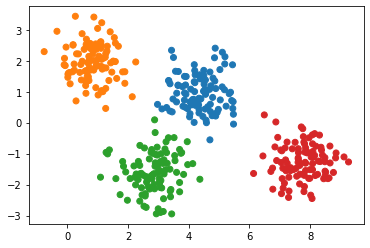

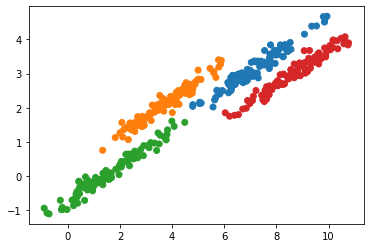

In [4]:
fig, ax = plt.subplots()

colors = {1:'tab:blue', 2:'tab:orange', 3:'tab:green', 4:'tab:red'}

ax.scatter(data1['X1'], data1['X2'], c=data1['truth'].map(colors))

fig, ax = plt.subplots()

ax.scatter(data2['X1'], data2['X2'], c=data2['truth'].map(colors))

plt.show()

# Apply Kmeans

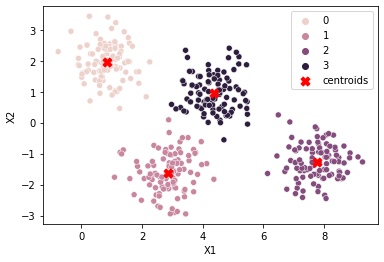

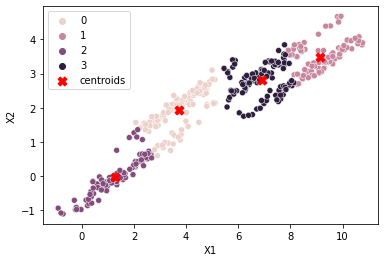

In [11]:
from sklearn.cluster import KMeans
import seaborn as sns

km41 = KMeans(n_clusters=4, n_init=20).fit(data1[['X1', 'X2']])
km42 = KMeans(n_clusters=4, n_init=20).fit(data2[['X1', 'X2']])

fig, ax = plt.subplots()

sns.scatterplot(data = data1, x='X1', y='X2', hue = km41.predict(data1[['X1', 'X2']]))

ax.scatter(km41.cluster_centers_[:,0], km41.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")

plt.legend()

fig, ax = plt.subplots()

sns.scatterplot(data = data2, x='X1', y='X2', hue = km42.predict(data2[['X1', 'X2']]))

ax.scatter(km42.cluster_centers_[:,0], km42.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")

plt.legend()

k-means is not effective for the dataset 2

# Apply GMM

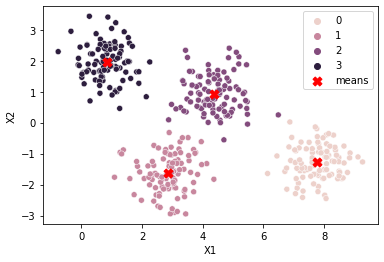

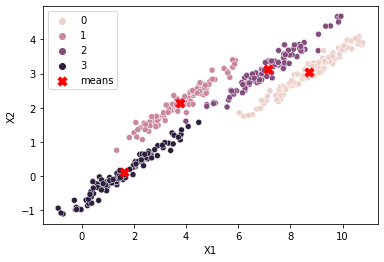

In [5]:
from sklearn.mixture import GaussianMixture

gm1 = GaussianMixture(n_components=4, random_state=0).fit(data1[['X1', 'X2']])
gm2 = GaussianMixture(n_components=4, random_state=0).fit(data2[['X1', 'X2']])

fig, ax = plt.subplots()

sns.scatterplot(data = data1, x='X1', y='X2', hue = gm1.predict(data1[['X1', 'X2']]))

ax.scatter(gm1.means_[:,0], gm1.means_[:,1],
            marker="X", c="r", s=80, label="means")

plt.legend()



fig, ax = plt.subplots()

sns.scatterplot(data = data2, x='X1', y='X2', hue = gm2.predict(data2[['X1', 'X2']]))

ax.scatter(gm2.means_[:,0], gm2.means_[:,1],
            marker="X", c="r", s=80, label="means")

plt.legend()

In [8]:
n_components

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [33]:
# GaussianMixture(n_components = 1, random_state=0).fit(data1[['X1', 'X2']])

# for n_components = 1 it's not working  

GaussianMixture(n_components=2, random_state=0)

In [34]:
from sklearn import mixture

n_components = np.arange(2, 22)

models = [GaussianMixture(n_components = n, random_state=0).fit(data1) for n in n_components]

In [35]:
gmm_model_comparisons=pd.DataFrame({"n_components" : n_components,
                                  "BIC" : [m.bic(data1) for m in models],
                                   "AIC" : [m.aic(data1) for m in models]})
gmm_model_comparisons.head(20)

,n_components,BIC,AIC
0,2,2185.526847,2109.689020
1,3,326.943909,211.191437
2,4,-2022.884180,-2178.551298
3,5,-1969.515780,-2165.097543
4,6,-1914.528942,-2150.025350
5,7,-1863.369699,-2138.780753
6,8,-1801.827187,-2117.152886
7,9,-1753.990538,-2109.230883
8,10,-1694.994852,-2090.149842
9,11,-1644.004673,-2079.074309


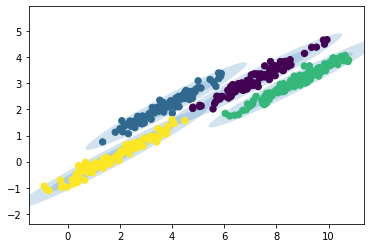

In [36]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        print(np.sqrt(covariance))
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X['X1'], X['X2'], c=labels, s=40, zorder=2)
    else:
        ax.scatter(X['X1'], X['X2'], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, [gmm.covariances_[n][:2, :2] for n in range(0,4)], gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


# With this in place, we can take a look at what the four-component GMM gives us for our initial data:
gmm = mixture.GaussianMixture(n_components=4, random_state=42)

plot_gmm(gmm, data2)

# EM on 1D

In [37]:
#EM on 1D
#8

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300,
                  n_features=1,
                  centers=3, 
                  cluster_std=2,
                  random_state=2021)


In [38]:
data = pd.DataFrame(X)
data.columns = ["X"]

data["source"] = y
data['source'].unique()


array([0, 1, 2])

In [39]:
gmm = GaussianMixture(2, covariance_type='full', random_state=0).fit(data["X"])

plt.figure(figsize=(9,7))

sns.scatterplot(data=data, x="X", hue="source")
plt.savefig("fig 1 dim",format='png',dpi=150)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.92118364e+00  4.27010105e+00  5.79784278e+00  2.99296077e+00
  5.27293937e+00  6.06001851e+00  9.45572971e-01  2.60518640e+00
 -6.27339685e+00  6.20934617e+00  3.09598651e+00 -7.75919497e+00
 -1.01502530e+01  4.22689188e+00  6.03210371e+00  2.83642062e+00
  2.47645126e+00 -8.31692753e-01  2.73552850e+00  3.53924133e+00
 -5.46566681e+00 -5.60018980e+00  1.85203083e+00  6.45710977e+00
 -7.60770270e+00  6.16100244e+00 -5.40609002e+00 -9.04350473e-01
  6.36326241e+00  3.75088149e+00 -9.45019485e+00 -5.02426706e+00
  1.43212388e+00 -7.93437871e+00 -6.56523750e+00 -6.46160794e+00
  3.72002201e+00 -9.48922050e+00  6.04923612e+00  5.40685790e+00
 -5.85804846e+00  2.98180612e+00  2.09755656e+00 -1.07936088e+01
  6.12831315e+00 -7.90751302e+00  4.42546583e+00 -6.88523147e-01
 -5.43711846e+00  4.08605472e+00 -9.85607873e+00  2.84031169e+00
 -3.73230918e-02  4.02793944e+00  5.20811355e+00  1.71154694e-01
 -7.14889993e+00 -9.12772492e+00  3.84513156e+00 -7.16142509e+00
 -7.23340643e+00 -5.73994319e+00  4.81292171e+00 -6.46809662e+00
 -9.24420889e+00  3.93778204e+00  6.19461542e+00  3.28525124e+00
  2.95596181e+00  4.05871286e+00 -3.25404225e+00  2.11930918e+00
 -5.38033872e+00  3.23530871e+00  3.15204026e+00 -1.41933086e-01
  3.67191800e+00  6.68984387e+00 -7.53470966e+00  5.23582720e+00
  5.19173231e+00  2.77572836e+00  4.20924055e+00 -4.91682941e-01
  2.03707753e+00 -9.19124530e+00 -1.23611739e+01 -2.68791874e+00
 -7.82928010e+00  1.77391860e+00 -6.12801464e-02  4.17880379e+00
  4.38963692e+00  3.56504372e+00 -8.06186401e+00  2.99984688e+00
  6.53092015e+00  3.97686467e+00  7.20916857e+00 -8.83932543e-02
  1.06808735e+00  7.55128004e+00 -9.76449226e+00 -1.06694189e+01
  3.17605684e+00  3.75916727e+00 -8.20496410e+00  8.24031900e-01
  3.61449583e-01 -8.08066584e+00  3.20248680e+00 -5.59265226e+00
 -5.30371925e-03 -6.55750717e+00  3.68470894e+00 -4.92596896e+00
  1.65628072e+00  1.71683363e+00  4.77480685e+00  9.76916852e+00
  4.71827953e-01  6.30294682e+00  5.66925337e+00  1.02507511e+00
 -6.85642007e+00  4.21534206e+00 -6.99297625e+00 -4.29908677e+00
 -7.82496483e+00  7.47281288e+00 -8.00452940e+00  4.48632365e+00
  1.15813008e-02 -9.49918784e+00  1.73936649e+00  6.44050973e+00
 -4.56552999e+00  3.93995508e+00 -9.81633088e+00 -6.44380346e+00
  5.57092741e+00  2.46347511e+00  6.18541273e-01  9.27985970e+00
  3.29721703e+00 -1.01015748e+01  6.14493095e+00 -6.93828505e+00
  3.66036090e+00 -7.27526496e+00  2.17053740e+00 -1.02437737e+01
  7.69540189e+00  2.26726744e+00  2.49401301e+00  6.91287007e+00
 -9.57249402e+00 -8.03188133e+00  3.70943915e+00  1.11605034e+00
  4.52277895e+00  3.04311344e+00  6.19575556e+00 -5.99950399e+00
 -4.07790213e+00  6.50583013e+00  3.84157054e+00  8.59346204e-01
 -7.06665889e+00  5.12796422e+00  1.42155307e+00 -8.41232079e+00
  4.54364332e+00  4.83193345e+00  7.11728692e+00  4.95384506e+00
  6.24851776e+00 -5.60161456e+00 -6.37965637e+00 -2.82498617e-01
 -2.04161423e-01  2.97686976e+00  7.05370155e+00 -1.00255274e+01
  1.69761187e+00 -9.31884161e+00 -6.79158082e+00 -8.20945141e+00
 -4.63470871e+00 -2.63389821e+00  4.83300807e+00  1.52454103e-02
  2.75397815e+00  6.04680511e+00 -6.67422729e+00  3.04603628e+00
 -7.63233745e+00 -6.55606101e+00  2.52486540e+00 -1.04148972e+01
  1.14100710e+00  8.53761320e-01 -7.06963827e+00 -8.11924528e+00
 -8.21747694e+00 -6.96494552e+00  5.51033150e+00 -3.80725210e-01
  7.35479291e+00  5.30534323e+00  3.34595000e+00  4.46115715e+00
 -9.67042037e+00 -6.92430804e+00  6.64369858e+00  3.11356262e+00
 -6.09669400e-01 -5.97937029e+00  3.01850201e+00  4.19883873e+00
  2.97509705e+00  6.88202001e+00  3.31562059e+00  4.13313782e+00
  2.97038343e+00 -4.23208925e+00  3.90871508e+00  5.16016163e-01
 -2.81345543e+00  2.27760610e+00  1.44434264e+00 -9.12292873e+00
  2.14051643e+00  5.72909255e+00  7.55898077e+00 -9.30499623e+00
  5.69040954e+00 -7.68048194e+00 -2.14162480e+00 -4.28395026e+00
  5.36830641e-01  8.31297232e+00  2.97096712e+00 -7.66175611e+00
  3.37796297e+00 -6.24086031e+00 -1.40162085e+00 -9.03371829e+00
  2.87148411e+00  3.01803486e+00 -6.53724386e+00  4.08882723e-01
  2.38771976e+00  3.46057388e+00  2.81113799e+00 -9.04049141e-01
  7.15497033e+00  1.96339923e+00 -8.84367481e+00  8.12199714e+00
  5.07700943e+00  6.07243256e+00 -6.43270760e+00  2.75221304e+00
  2.54280756e+00  6.73268917e+00  2.25021525e+00 -3.47019833e+00
  2.04504748e+00  3.10613031e+00  1.10485287e+00  4.23752993e+00
 -7.04942051e+00 -5.69497005e+00 -5.21430964e+00 -7.62997609e+00
 -1.04299383e+01 -8.04149081e+00 -7.51516068e+00  3.86458069e+00
  5.14132876e+00  2.28856769e+00  2.80749723e+00  5.67900738e+00
  7.52793371e+00  5.88333071e+00  8.51124290e-01  4.51449684e+00
  1.61658639e+00  3.23689375e-01  4.34575105e+00 -5.20296585e+00
  1.77188766e+00 -1.40759085e+00  5.88896091e+00  5.38139060e+00
 -6.17581648e+00  8.15137327e+00 -6.40684947e+00  1.47731905e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.